## 泰坦尼克号数据集处理

**什么样的人更有可能幸免遇难**

### 导入所需工具包&数据

In [1]:
#数据分析与可视化包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
#accuracy_score,准确率
#f1_score，精确率和召回率的调和平均数
#precision_score，精确率
#recall_score，召回率

from sklearn.metrics import confusion_matrix, classification_report
#confusion_matrix混淆矩阵
#classification_report任务性能分析

In [2]:
Titanic_data=pd.read_csv("D:/project/Jupyter/csdn/AI_ML/datasets/Lesson3_Titanic.csv")

In [3]:
Titanic_data

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


In [4]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Embarked     1307 non-null   float64
 8   Survived     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


### 数据预处理

In [5]:
# 将 float 类型转换为 int 类型
Titanic_data['Age'] = Titanic_data['Age'].astype('int64')
Titanic_data['Fare'] = Titanic_data['Fare'].astype('int64')

In [6]:
# 用众数填充 Embarked（登船地点）列缺失值
Titanic_data['Embarked'].fillna(Titanic_data['Embarked'].mode()[0], inplace=True)

In [7]:
# 将 float 类型转换为 int 类型
Titanic_data['Embarked'] = Titanic_data['Embarked'].astype('int64')

### 绘制热力图

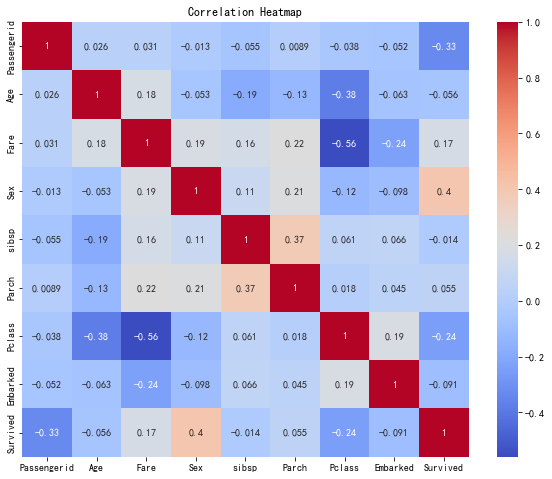

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(Titanic_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 数据拆分&标准化

In [9]:
# 特征选择
X = Titanic_data.drop('Survived', axis=1)
y = Titanic_data['Survived']

In [10]:
# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 标准化特征（可选，但推荐逻辑回归中进行特征缩放）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 逻辑回归分类算法

In [12]:
# 使用 scikit-learn 的逻辑回归模型
model = LogisticRegression(
    max_iter=10000,
    penalty='l2',
    #C=0.1,
    #solver='liblinear',
    class_weight="balanced"
    )
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [13]:
# 预测
y_pred_test = model.predict(X_test)

In [15]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       189
           1       0.57      0.79      0.67        73

    accuracy                           0.78       262
   macro avg       0.74      0.78      0.75       262
weighted avg       0.81      0.78      0.79       262



In [16]:
y_pred_train = model.predict(X_train)

In [17]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       778
           1       0.55      0.76      0.64       269

    accuracy                           0.78      1047
   macro avg       0.73      0.77      0.74      1047
weighted avg       0.81      0.78      0.79      1047



In [18]:
confusion_matrix(y_train,y_pred_train)#生成混淆矩阵

array([[610, 168],
       [ 64, 205]], dtype=int64)

<AxesSubplot:>

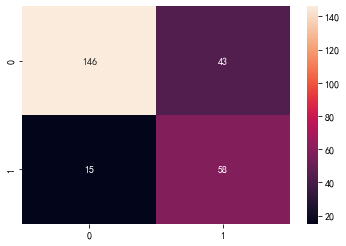

In [19]:
#画热力图
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt="d")

In [20]:
accuracy_score(y_pred_test,y_test)#准确率

0.7786259541984732

In [21]:
f1_score(y_pred_test,y_test)#精确率和召回率的调和平均数

0.6666666666666666

In [22]:
# 从负类，计算模型精确率和召回率
precision_score(y_pred_test,y_test,pos_label=0)#精确率

0.7724867724867724

In [23]:
recall_score(y_pred_test,y_test,pos_label=0)#召回率

0.906832298136646

In [24]:
print(model.coef_)

[[-3.10234860e-03 -3.18906621e-02  3.87032028e-04  2.04439845e+00
  -3.41696663e-01  5.48257566e-03 -9.40158683e-01 -1.44452120e-01]]


In [25]:
print(model.intercept_)

[4.22305143]


In [26]:
# 显示模型系数
coefficients = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])
print(coefficients)

             Coefficient
Passengerid    -0.003102
Age            -0.031891
Fare            0.000387
Sex             2.044398
sibsp          -0.341697
Parch           0.005483
Pclass         -0.940159
Embarked       -0.144452


<AxesSubplot:>

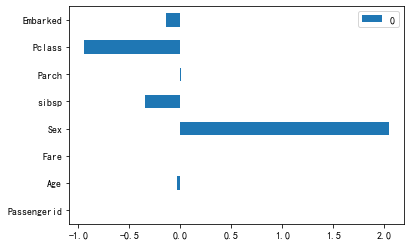

In [27]:
pd.DataFrame(model.coef_,columns=X.columns).T.plot(kind="barh")#显示系数大小

In [28]:
model.predict_proba(X_test)

array([[0.96580127, 0.03419873],
       [0.83101284, 0.16898716],
       [0.94407356, 0.05592644],
       [0.84483793, 0.15516207],
       [0.78551783, 0.21448217],
       [0.18692877, 0.81307123],
       [0.74254446, 0.25745554],
       [0.2032734 , 0.7967266 ],
       [0.7163385 , 0.2836615 ],
       [0.50638135, 0.49361865],
       [0.975473  , 0.024527  ],
       [0.96755622, 0.03244378],
       [0.81917859, 0.18082141],
       [0.29965241, 0.70034759],
       [0.94602736, 0.05397264],
       [0.47556876, 0.52443124],
       [0.82354381, 0.17645619],
       [0.95569124, 0.04430876],
       [0.47627269, 0.52372731],
       [0.85410499, 0.14589501],
       [0.94110641, 0.05889359],
       [0.42914158, 0.57085842],
       [0.95247526, 0.04752474],
       [0.7574298 , 0.2425702 ],
       [0.91813644, 0.08186356],
       [0.44302977, 0.55697023],
       [0.77517103, 0.22482897],
       [0.72188054, 0.27811946],
       [0.92118708, 0.07881292],
       [0.16597776, 0.83402224],
       [0.

In [29]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [46]:
# 从正类，计算精确率和召回率
precision = precision_score(y_test, y_pred_test,pos_label=1)
recall = recall_score(y_test, y_pred_test,pos_label=1)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.5742574257425742
Recall: 0.7945205479452054


### 绘制 PR 曲线

Text(0, 0.5, 'precision')

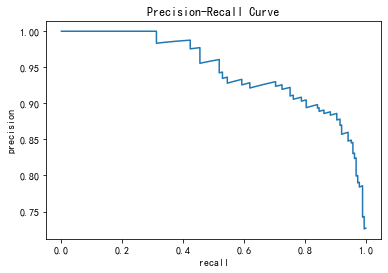

In [32]:
probs=model.predict_proba(X_test)[:,0]
precision,recall,thresholds=precision_recall_curve(y_test,probs,pos_label=0)
plt.plot(recall,precision)
plt.title("Precision-Recall Curve")
plt.xlabel("recall")
plt.ylabel("precision")

In [33]:
pd.DataFrame([precision,recall,thresholds])

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,0.726923,0.725869,0.728682,0.731518,0.734375,0.737255,0.740157,0.743083,0.742063,0.745020,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,1.000000,0.994709,0.994709,0.994709,0.994709,0.994709,0.994709,0.994709,0.989418,0.989418,...,0.047619,0.042328,0.037037,0.031746,0.026455,0.021164,0.015873,0.010582,0.005291,0.0
2,0.022361,0.025166,0.029057,0.031206,0.031355,0.037128,0.052464,0.061954,0.063087,0.063690,...,0.970771,0.970783,0.972835,0.974363,0.975473,0.976636,0.983098,0.991933,0.997303,NaN


### 绘制 ROC 曲线

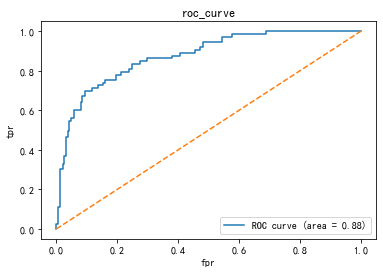

In [34]:
probs=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,probs,pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("roc_curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc='lower right')
plt.show()